# Data Science Technology and Systems
### Assignment 1: Part A - Importing and Understanding Data
##### Sumedha Verma (u3214504) 

In [1]:
# had to create an environment to install geopandas as my computer was having issues with it 
conda activate geo_env


Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries 
import os
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set up figure displays
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
# importing data 
data = pd.read_csv('data/zomato_df_final_data.csv')
data.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

#### I. Initial Graphs and Plots 

Exploring the number of unique cuisines served by Sydney restaurants. The cuisine variable conisists of a list of all cuisines served by each restaurant. The list of cuisines is in a string variable. 

In [4]:
# Cleaning and plotting the number of cuisines in sydney 
# Converting the column to a list 
cuisine = data['cuisine'].to_list()

# deriving individual cuisines
unique_cuisine = [] # create empty list 
for item in cuisine:  # for each item in cuisine separate by comma, and keep only letters
    item_split = item.split(',')
    for x in item_split: 
        x = re.sub(r'[^\w\s]', "", x)
        x = re.sub('[^a-zA-Z]+', '', x)        
        unique_cuisine.append(x)

# convert into a data frame 
cuisine_data = pd.DataFrame({'freq': unique_cuisine})

# output unique cuisines
unique_cuisine_names = np.unique(cuisine_data['freq'])
print('The unique cuisines served in Sydney restaurants are as follows: \n ' + str(unique_cuisine_names))
print('\n There are ' + str(len(unique_cuisine_names)) + ' cuisines served in Sydney')

The unique cuisines served in Sydney restaurants are as follows: 
 ['Afghani' 'African' 'American' 'Arabian' 'Argentine' 'Asian' 'Australian'
 'Austrian' 'BBQ' 'Bakery' 'Bangladeshi' 'BarFood' 'Belgian' 'Beverages'
 'Brasserie' 'Brazilian' 'British' 'BubbleTea' 'Burger' 'Burmese' 'Cafe'
 'Cambodian' 'Cantonese' 'Caribbean' 'CharcoalChicken' 'Chinese'
 'CoffeeandTea' 'Colombian' 'Contemporary' 'Continental' 'Creole' 'Crepes'
 'Croatian' 'Cuban' 'Czech' 'Deli' 'Desserts' 'Diner' 'DrinksOnly'
 'Dumplings' 'Dutch' 'EasternEuropean' 'Egyptian' 'Ethiopian' 'European'
 'Falafel' 'FastFood' 'Filipino' 'FingerFood' 'FishandChips' 'French'
 'FrozenYogurt' 'Fusion' 'German' 'Greek' 'Grill' 'Hawaiian' 'HealthyFood'
 'HotPot' 'Hungarian' 'IceCream' 'Indian' 'Indonesian' 'International'
 'Iranian' 'Iraqi' 'Irish' 'Israeli' 'Italian' 'Japanese' 'JapaneseBBQ'
 'Jewish' 'Juices' 'Kebab' 'Kiwi' 'Korean' 'KoreanBBQ' 'LatinAmerican'
 'Lebanese' 'Malaysian' 'MeatPie' 'Mediterranean' 'Mexican'
 'MiddleEaste

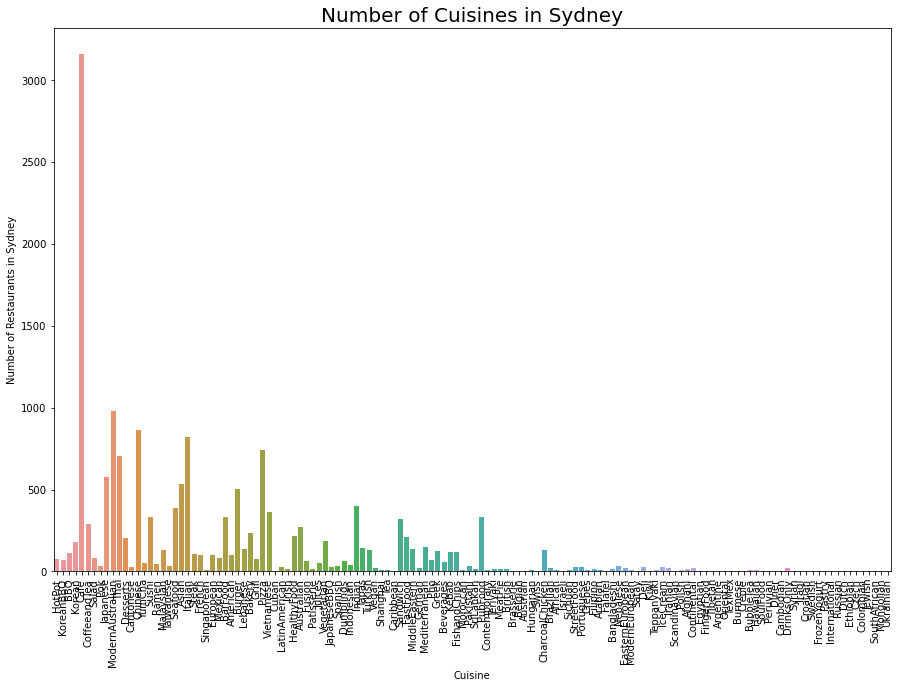

In [5]:
# create a plot 
sns.countplot(x = 'freq', data = cuisine_data) # define plot
plt.xticks(rotation = 90) # rotate x axis tick labels
plt.title('Number of Cuisines in Sydney', size = 20) # define plot labels and titles
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants in Sydney')
plt.show()

Since there are a 134 unique cuisines served in sydney, it is difficult to visualise the unique cuisines in one plot. It is important to note that there are more than 3000 cafes in Sydney, which is significantly higher than the number of other cuisines in Sydney.

Next the number of restaurants per suburb will be explored. The top 3 highest suburbs will be considered  

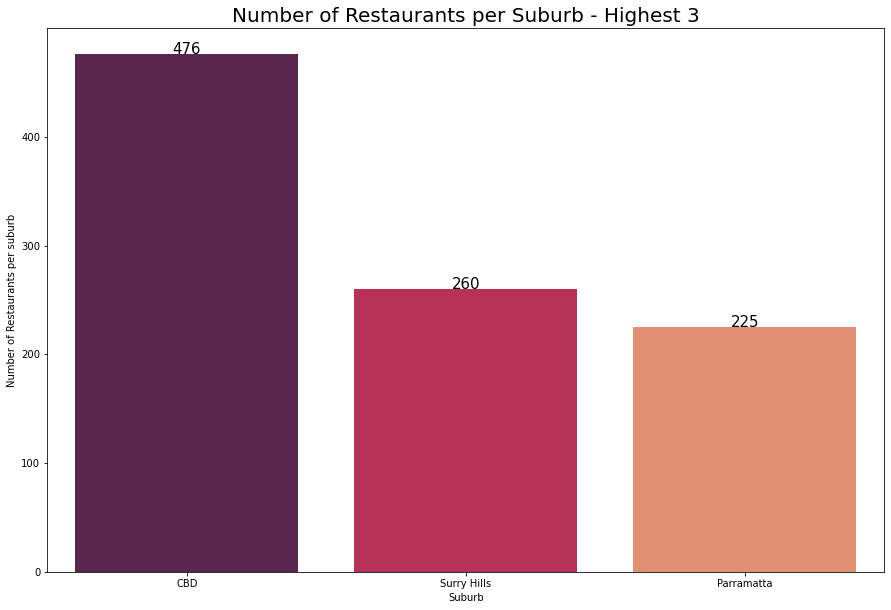

In [6]:
# Data wrangling to explore number of restaurants per suburb 
# counting suburbs and returning the frequency per suburb
suburb_count = pd.DataFrame(data['subzone'].value_counts()[:3])

# cleaning the dataset 
suburb_count['suburb'] = suburb_count.index
suburb_count = suburb_count.rename(columns = {"suburb": "suburb", "subzone": "freq"},
                                  index = {"CBD" : 0, "Surry Hills" : 1, "Parramatta": 2})

# visualising the suburbs 
fig = sns.barplot(x = 'suburb', y = 'freq', data = suburb_count, palette = 'rocket') # define plot 
for index, row in suburb_count.iterrows(): # create data value labels for each bar 
    fig.text(row.name, row.freq, row.freq, color = 'black', ha ='center', size = 15)
plt.title('Number of Restaurants per Suburb - Highest 3', size = 20) # define plot labels 
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants per suburb')
plt.show()

It can be observed from the plot that Sydney CBD has the highest number of suburbs, followed by Surry Hills and Parramatta. There are 476 restaurants in the CBD. Which is significantly higher than surry hills and Paramatta which are between 200-300 restaurants.

Next, the claim that 'excellent' ratings are given to more expensive restaurants and these restaurants are rarely assigned the 'poor' ratings, will be explored. 

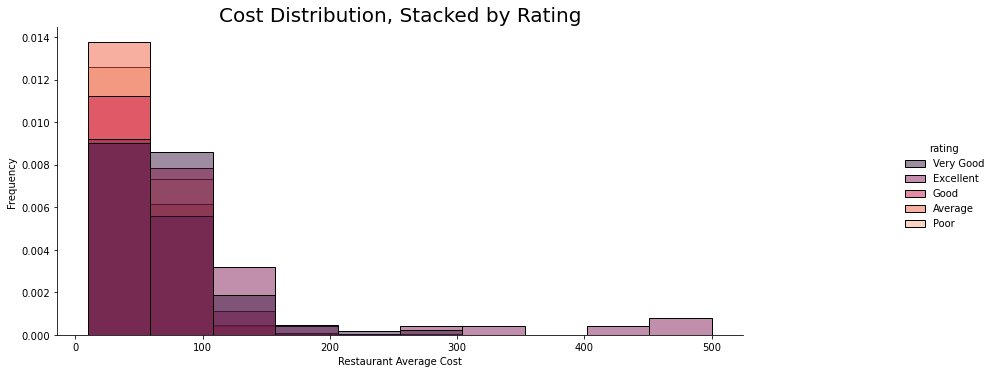

In [7]:
# Wsrangling data to explore this relationship
# creating a subset of the data with rating_text and cost 
cost_rating = {'rating': data['rating_text'],
              'cost': data['cost']}
cost_rating = pd.DataFrame(cost_rating)
cost_rating = cost_rating.dropna()

# create visualisation 
fig3 = sns.displot(cost_rating, x = 'cost', hue = 'rating', bins = 10, palette = 'rocket', 
                   stat = 'density', common_norm = False) # define plot
fig3.fig.set_size_inches(15, 5) #redifine fig size because it was being ignored
plt.title('Cost Distribution, Stacked by Rating', size = 20) # define plot labels 
plt.xlabel('Restaurant Average Cost')
plt.ylabel('Frequency')
plt.show()

The plot above shows that this claim is slightly true. Average to poor ratings are rarely given to high-end restaurants, past the cost of $300. However, excellent ratings are also distributed along the cheaper restaurants too. Making the first part of the  statement false ('excellent ratings are mostly very expensive restaurant) as excellent ratings are given to restaurants of all cost ranges. The second part of the statement is true though ('restaurants with poor ratings are rarely expensive), since no expensive restaurants have poor ratings.

#### II. Exploratory Data Analysis

Exploratory data analysis will be performed on the restaurant dataset. The cost variable and its relationships will be explored first. From the cost distribution above, it can be seen that the cost distribution is skewed to the right. Hence, cost's relationship with rating will be explored next 

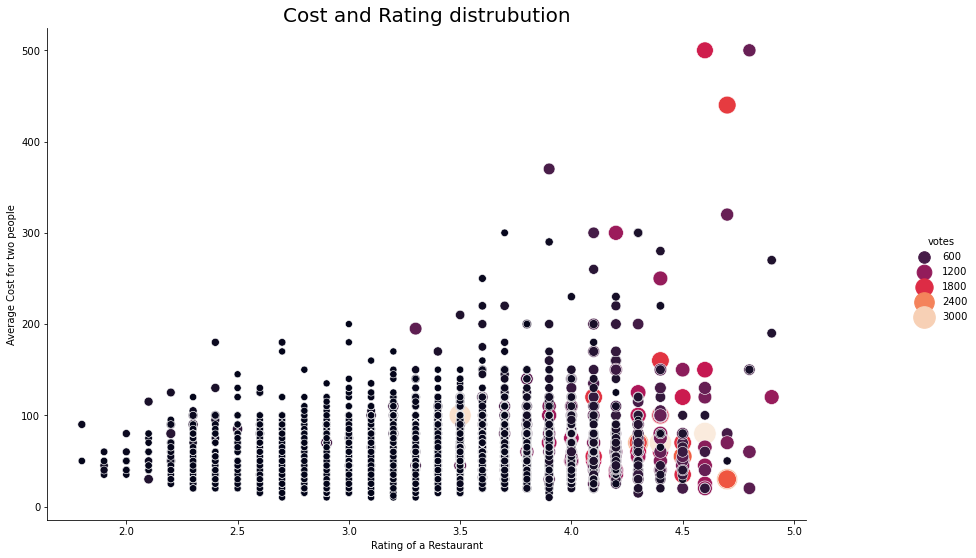

In [8]:
# creating the visualisation  
fig4 = sns.relplot(x = data['rating_number'], y = data['cost'], hue = data['votes'], palette = 'rocket', # defining the plot
            size = data['votes'], sizes = (50,500))
fig4.fig.set_size_inches(15, 8) #redifine fig size because it was being ignored
plt.title('Cost and Rating distrubution', size = 20) # define plot labels 
plt.xlabel('Rating of a Restaurant')
plt.ylabel('Average Cost for two people')
plt.show()

The plot above shows the relationship between the rating of a restaurant and its average cost for two people. The outlying, expensive restaurants tend to get a very high rating. The ratings of the cheaper restaurants are distributed from very low to very high. The size of the scatter points shows the number of reviews on these restaurants. Most restaurants have very small points- showing that most sydney restaurants have 600 or fewer reviews. The restaurants with higher ratings, have bigger sized points, showing that these restaurants are more popular, and that more people are give these a higher rating.

Next the cost distribution with the type of restaurant will be explored 

The unique types of Sydney restaurants are as follows: 
 ['Bakery' 'Bar' 'BeverageShop' 'Caf' 'CasualDining' 'Club'
 'DessertParlour' 'FastFood' 'FineDining' 'FoodCourt' 'FoodStall'
 'FoodTruck' 'Missing' 'Pub' 'WineBar']

 There are 15 types of restaurants Sydney


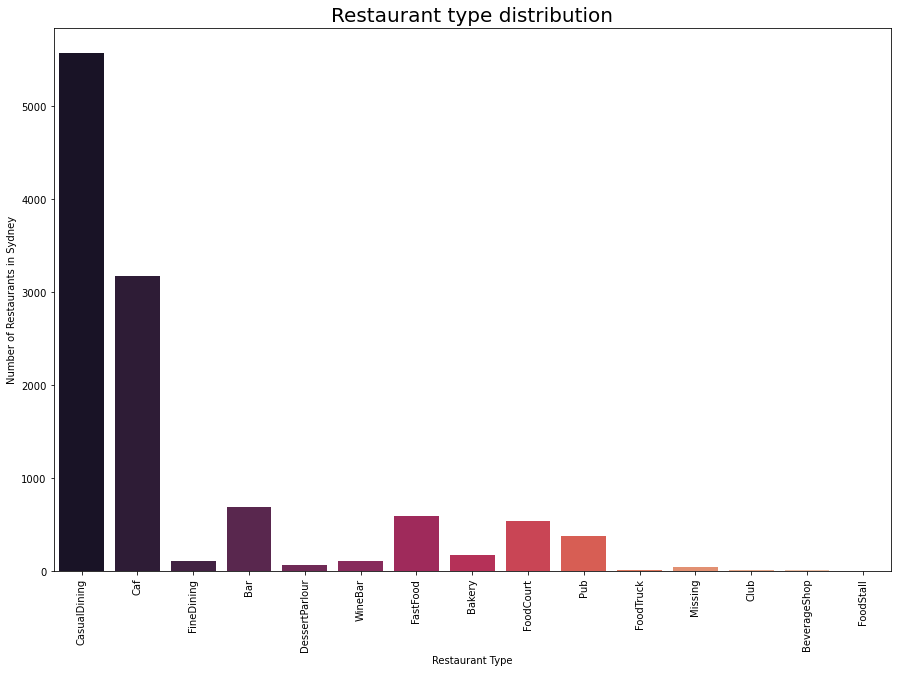

In [9]:
# Cleaning and plotting the number of cuisines in sydney 
# Converting the column to a list 
col_name = ['type']
for df_temp in [data]:
    for col in col_name:
        col_missing = 'Missing' # get it only from training
        df_temp[col].fillna(col_missing, inplace=True)


# deriving individual cuisines
# Converting the column to a list 
type_restaurant = data['type'].to_list()

unique_type = [] # create empty list 
for item in type_restaurant:  # for each item in cuisine separate by comma, and keep only letters
    item_split = item.split(',')
    for x in item_split: 
        x = re.sub(r'[^\w\s]', "", x)
        x = re.sub('[^a-zA-Z]+', '', x)        
        unique_type.append(x)

# convert into a data frame 
type_data = pd.DataFrame({'freq': unique_type})

# output unique cuisines
unique_type_names = np.unique(type_data['freq'])
print('The unique types of Sydney restaurants are as follows: \n ' + str(unique_type_names))
print('\n There are ' + str(len(unique_type_names)) + ' types of restaurants Sydney')

# create a plot 
sns.countplot(x = 'freq', data = type_data, palette = 'rocket') # define plot
plt.xticks(rotation = 90) # rotate x axis tick labels
plt.title('Restaurant type distribution', size = 20) # define plot labels and titles
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants in Sydney')
plt.show()


Casual dining has the highes number of restaurants in sydney, followed by cafes and then bars. Food stalls, FoodTrucks and Beverage Shops are the least common types of restaurants in Sydney.

Next the highest costing restaurants will be explored 

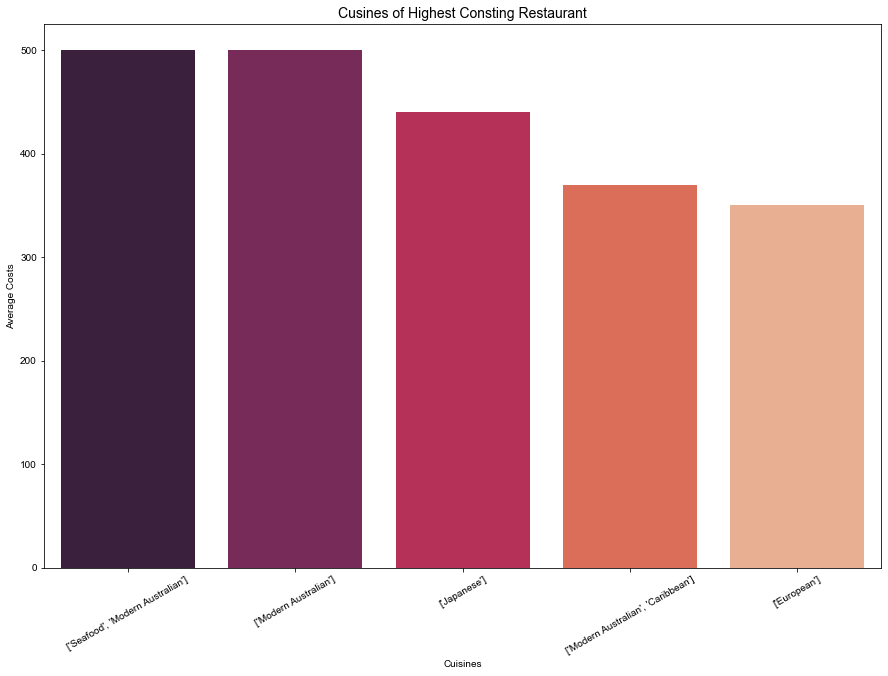

In [10]:
# Explrong Highest cost 
# sorting by highest cost 
highest_cost = data.sort_values(by = ['cost'], ascending = False).head(5)

# visualising the suburbs 
fig8 = sns.barplot(x = 'cuisine', y = 'cost', data = highest_cost, palette = 'rocket')# define plot 
sns.set(rc={'figure.figsize':(6,4)})
plt.title('Cusines of Highest Consting Restaurant', size = 14) # define plot labels 
plt.xlabel('Cuisines')
plt.xticks(rotation = 30) 
plt.ylabel('Average Costs')
plt.show()

Mordern Australian Restaurants appear to be the most expensive of cuisines, with the 1st, 2nd and 4th most expensive restaurants are Mordern Australian cuisines. The most expensive (two) restaurants cost $500 for two people. 

#### Creating Cuisine Density Map

To create a function that takes an input of a cuisine type and outputs a frequency heatmap, first the data needs to be cleaned 

In [11]:
# importing the package 
import geopandas as gpd

In [12]:
# reading the suburb data file for Sydney
sydney = gpd.read_file('data/sydney.geojson') # read file 

In [13]:
# Creating a data frame with cuisines latitude and Longitude 
cuisines = {'long': data['lng'],
             'lat': data['lat'],
             'cuisine': data['cuisine']}
cuisines = pd.DataFrame(cuisines)

In [14]:
# converting the cuisines dataset into a geopandas data frame 
processed = gpd.GeoDataFrame(cuisines, geometry=gpd.points_from_xy(cuisines.long, cuisines.lat))
processed = gpd.GeoDataFrame({'geometry':processed['geometry'],'cuisine': processed['cuisine']}) # change names

# change the crs for the processed dataset 
processed = processed.set_crs("EPSG:4326")

# combine the processed cuisine data set with the Sydney dataset 
loc_cuisine = gpd.sjoin(sydney, processed, how = 'inner', op ='contains')

# convert the region name for sydney to lower case so it matches 
sydney['SSC_NAME'] = sydney.SSC_NAME.astype(str).str.lower()

C:\Users\61439\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
# DEFINE A FUNCTION TO TAKE AN INPUT OF A STRING 
def create_cuisine_densitymap(string): # take input for a cuisine name 
    string = str(string) # convert to string
    
    # If string exists in the string in the cuisine column, assign that column to a new data frame 
    df = loc_cuisine[loc_cuisine['cuisine'].str.contains(string)]
    # create a counter to count frequency 
    df['count'] = 1    
    
    # group by each suburb and aggregate count
    dataByNeighbourhood = df.groupby('SSC_NAME').count()[['count']].reset_index()
    
    # convert every entry to lower case to match the sydney geo data
    dataByNeighbourhood['SSC_NAME'] = dataByNeighbourhood['SSC_NAME'].str.lower()
    
    # merge the sydney and restaurant cuisine data frame 
    merged = sydney.set_index('SSC_NAME').join(dataByNeighbourhood.set_index('SSC_NAME'))
    merged = merged.reset_index()
    
    # fill 0 for every missing count value 
    column_names = ['count']
    for df_temp in [merged]:
        for col in column_names:
            df_temp[col].fillna(0, inplace=True)
    
    # initialise the figure and define figure size 
    fig, ax = plt.subplots(1, figsize=(10, 10))
    
    # define titles and format heat map 
    ax.axis('off')
    ax.set_title('Heat Map of Sydney by Cuisine', fontdict={'fontsize': '25', 'fontweight' : '3'})
    vmin, vmax = 0, 231
    sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=vmin,vmax=vmax))
    
    # create plot output 
    merged.plot('count', cmap='RdPu', linewidth=0.8, ax=ax,edgecolor='0.8', figsize=(20,10))


C:\Users\61439\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


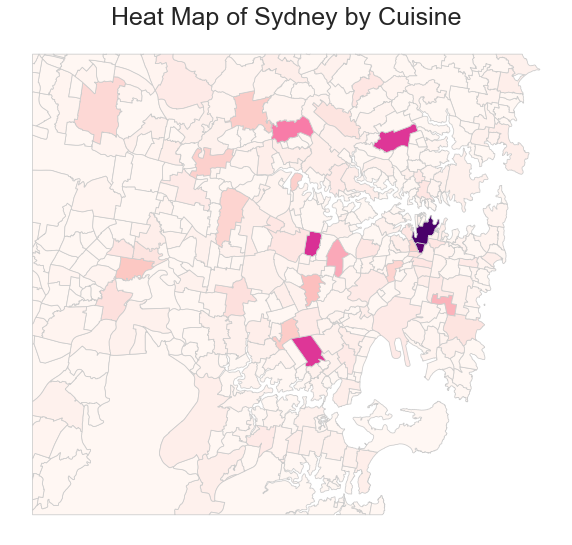

In [23]:
# Test the function plot for CHinese cuisine
create_cuisine_densitymap('Chinese')

C:\Users\61439\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


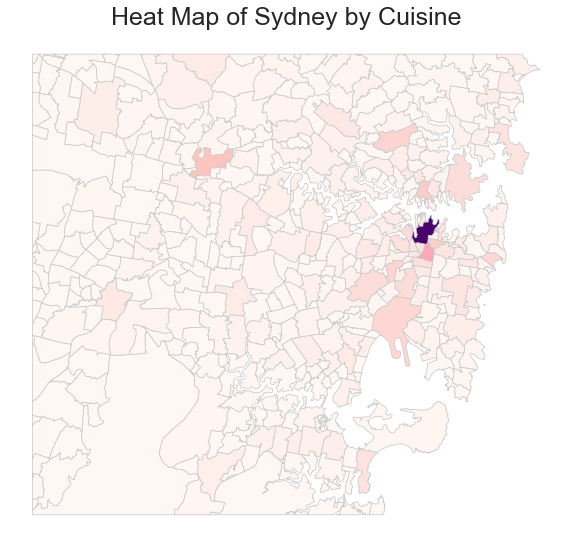

In [24]:
# Test the function plot for Cafes
create_cuisine_densitymap('Cafe')

C:\Users\61439\Anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


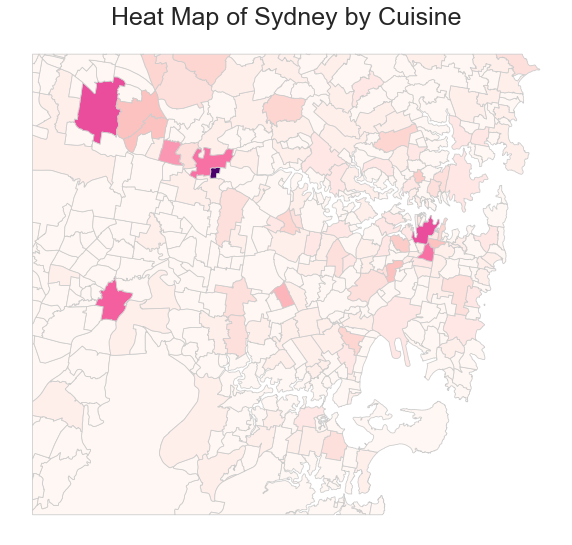

In [25]:
# Test the function plot for Indian cuisine
create_cuisine_densitymap('Indian')